In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dzj5HlFSOrWJL4gX_RaQf7T4PcZk8WRP' -O 'global-forecast-2.csv'

--2020-05-09 06:00:23--  https://docs.google.com/uc?export=download&id=1dzj5HlFSOrWJL4gX_RaQf7T4PcZk8WRP
Resolving docs.google.com (docs.google.com)... 173.194.76.100, 173.194.76.102, 173.194.76.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.76.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fn27rdponld6fjoji2odrfhmjf93fpg3/1589004000000/05025234699203190086/*/1dzj5HlFSOrWJL4gX_RaQf7T4PcZk8WRP?e=download [following]
--2020-05-09 06:00:23--  https://doc-14-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fn27rdponld6fjoji2odrfhmjf93fpg3/1589004000000/05025234699203190086/*/1dzj5HlFSOrWJL4gX_RaQf7T4PcZk8WRP?e=download
Resolving doc-14-3k-docs.googleusercontent.com (doc-14-3k-docs.googleusercontent.com)... 173.194.76.132, 2a00:1450:400c:c00::84
Connecting to doc-14-3k-docs.googleusercontent.com (doc-14-3k-d

In [0]:
df = pd.read_csv('./global-forecast-2.csv')

In [4]:
df.head()

,MAP_ID,MONTH,MONTH_SIN,MONTH_COS,Median_NrIncidentsLastWeekPast,Median_NrIncidentsLastMonthPast,Median_NrCrimesLastWeekPast,Median_NrCrimesLastMonthPast,NB_PROPERTIES,FLOORS,HOUSINGS,YEAR_CONSTRUCTION,LAND_AREA,BUILDING_AREA,USAGE_LOGEMENT,CATEGORY_REGULAR,CATEGORY_CONDOMINIUM,RISK_ZONE_ID
0,1-10,12,0.0,1.000,0.0,0.0,0.0,0.0,16,2.0,1.0,1956.0,445.0,230.0,0.813,0.813,0.188,1
1,1-11,12,0.0,1.000,0.0,0.0,0.0,0.0,18,2.0,1.0,1932.5,387.5,268.0,0.833,0.667,0.333,1
2,1-11,3,1.0,0.000,0.0,0.0,0.0,0.0,18,2.0,1.0,1932.5,387.5,268.0,0.833,0.667,0.333,1
3,1-11,5,0.5,-0.866,0.0,0.0,0.0,0.0,18,2.0,1.0,1932.5,387.5,268.0,0.833,0.667,0.333,1
4,1-11,6,0.0,-1.000,0.0,0.0,0.0,0.0,18,2.0,1.0,1932.5,387.5,268.0,0.833,0.667,0.333,2


In [5]:
df.shape[1]

18

In [6]:
df.shape[0]

24410

In [7]:
df['RISK_ZONE_ID'].value_counts()

2    8043
1    7759
3    5791
4    2503
5     314
Name: RISK_ZONE_ID, dtype: int64

In [8]:
num_classes = df['RISK_ZONE_ID'].nunique()
num_classes

5

In [0]:
X = df.drop(['MAP_ID', 'MONTH', 'RISK_ZONE_ID'], axis=1).values

In [0]:
y = df.loc[:,'RISK_ZONE_ID'].values

In [0]:
y_norm = y-1

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import scale
X = scale(X)

In [13]:
X.shape

(24410, 15)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y_norm,random_state=0)

In [15]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24410, 15), (18307, 15), (6103, 15), (18307,), (6103,))

In [16]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [17]:
X.shape, X_train.shape, X_test.shape, y_train_cat.shape, y_test_cat.shape

((24410, 15), (18307, 15), (6103, 15), (18307, 5), (6103, 5))

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, Adamax, Nadam, SGD, RMSprop, Adagrad, Adadelta
import time

inputs = Input(shape=(15,))

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.4)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(num_classes, activation='softmax')(x)

func_model = Model(inputs, outputs)

func_model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(lr=0.002),
                    metrics=['accuracy'])

In [32]:
func_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               8192      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 2565      
Total params: 273,413
Trainable params: 273,413
Non-trainable params: 0
_____________________________________________________

In [33]:
X_test.shape

(6103, 15)

In [40]:
early_stopping_monitor = EarlyStopping(patience=5, monitor = 'val_accuracy')

startTime = time.time()

training = func_model.fit(X_train, y_train_cat, batch_size=32,
          epochs=50, verbose=1, validation_split=0.2, callbacks = [early_stopping_monitor])

endTime = time.time()

history = training.history

print ('\nTraining time: %0.2f seconds' % (endTime - startTime))

Train on 14645 samples, validate on 3662 samples
Epoch 1/50
14645/14645 [==============================] - 2s 135us/step - loss: 1.0768 - accuracy: 0.5002 - val_loss: 1.0645 - val_accuracy: 0.4951
Epoch 2/50
14645/14645 [==============================] - 2s 136us/step - loss: 1.0704 - accuracy: 0.4957 - val_loss: 1.0611 - val_accuracy: 0.4853
Epoch 3/50
14645/14645 [==============================] - 2s 136us/step - loss: 1.0674 - accuracy: 0.4983 - val_loss: 1.0712 - val_accuracy: 0.4989
Epoch 4/50
14645/14645 [==============================] - 2s 135us/step - loss: 1.0631 - accuracy: 0.5045 - val_loss: 1.0550 - val_accuracy: 0.4959
Epoch 5/50
14645/14645 [==============================] - 2s 131us/step - loss: 1.0629 - accuracy: 0.5048 - val_loss: 1.0605 - val_accuracy: 0.4932
Epoch 6/50
14645/14645 [==============================] - 2s 137us/step - loss: 1.0634 - accuracy: 0.5016 - val_loss: 1.0490 - val_accuracy: 0.4962
Epoch 7/50
14645/14645 [==============================] - 2s 13

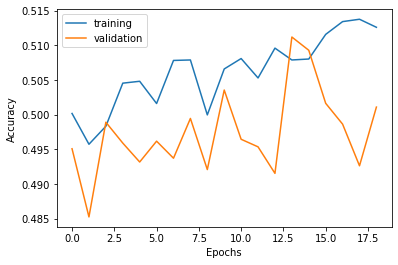

In [41]:
plt.figure(figsize=(6,4))

plt.plot(history['accuracy'], label = 'training')
# Plot the validation accuracy
plt.plot(history['val_accuracy'], label = 'validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')


# Show the figure
plt.legend()
plt.show()

In [42]:
score = func_model.evaluate(X_test, y_test_cat,
                       batch_size=64, verbose=1)
print('Test accuracy: %0.5f' % score[1])

6103/6103 [==============================] - 0s 37us/step
Test accuracy: 0.51221


In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
import numpy as np

y_pred = np.argmax(func_model.predict(X_test), axis=1)

print('Accuracy: %0.5f' % accuracy_score(y_test, y_pred))
print('F1 score: %0.5f' % f1_score(y_test, y_pred, average='micro'))
print('Cohen`s kappa score: %0.5f' % cohen_kappa_score(y_test, y_pred))
print('\nConfusion matrix:')
confusion_matrix(y_test, y_pred)

Accuracy: 0.51221
F1 score: 0.51221
Cohen`s kappa score: 0.31948

Confusion matrix:


array([[1550,  241,  109,   11,    0],
       [ 945,  715,  358,   43,    0],
       [ 366,  358,  573,  152,    1],
       [  33,   66,  261,  234,    8],
       [   0,    1,    1,   23,   54]])